## PYCITYSCHOOLS

In this project, the task is to help the school board and mayor make strategic decisions regarding future school budgets and priorities.


In [26]:
#import the neccessary packages
import pandas as pd
import matplotlib.pyplot as plt

Use thr function reading_file() to read thr file , which takes argument path of the .csv file and returns the dataframe

In [4]:
def reading_file(path):
    #variable path is a string which contains the address of .csv file 
    filePath=open(path)
    df=pd.read_csv(filePath)
    #return the dataframe
    return df

In [5]:
#call the function reading_file() to read .csv with student details and stores values to student_df dataframe
student_df=reading_file("raw_data/students_complete.csv")
#call the function reading_file() to read .csv with school details and stores values to school_df dataframe
school_df=reading_file("raw_data/schools_complete.csv")

In [6]:
school_df.head()

,School ID,name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [7]:
student_df.head()

,Student ID,name,gender,grade,school,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


It can be seen from above two data that two dataframes should be merged. The only column based on which merge can be performed is name of school. Since the column name of school name is different in two dfs , rename school_df column <i>name</i> to <i>school</i>.

In [8]:
# rename the column 
school_df=school_df.rename(columns={"name":"school"})
school_df.head()

,School ID,school,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


Now the column names are same, perform merge, on <i>school</i>

In [9]:
student_school_df=pd.merge(student_df,school_df,on="school")

In [10]:
student_school_df.head()

,Student ID,name,gender,grade,school,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District

The first task, is  to analyze the district-wide standardized test results. Every student's math and reading scores, as well as various information on the schools they attend are given. Aggregate the data  and showcase obvious trends in school performance.

The function pass_score() returns the % of passed students. It take arguments : DataFrame, Subject name :a string(maths or reading),and student count which is zero if returning pass count only. Pass_count returned is used in later function, to add value to dataframe, of which student count is calculated later.

In [177]:
def pass_score(df,subject,student_count): 
    # retrieves the subject name from df
    score=df[subject]
    pass_count=0
    # for each score check if its greater than 70: Increment count if so
    for score_mark in score:
        if score_mark>70:
            pass_count+=1
    # return pass count if student_count=0. 
    if student_count==0:
        return pass_count
    else: 
        # calculate pass % 
        district_pass_percentage=round((pass_count/student_count)*100,2)
        return district_pass_percentage


The function district_summary(), summarizes the details of the school on district level. It returns dataframe with summary. It uses pass_score() to calculate pass % for each subject

In [178]:
def district_summary():
    #create a new df , which is a series containing school details from district type only 
    district_school_df=school_df.loc[school_df["type"]=="District"]
    # Get sum of budget values.Since for each school, there is only one budget value, can take it from district_school_df
    district_budget_total=district_school_df["budget"].sum()
    #create other df, from merged df, to retrieve all values of type District
    district_df=student_school_df.loc[student_school_df["type"]=="District"]
    # Find required details
    district_school_count=len(district_df["School ID"].unique())
    district_student_count=len(district_df["Student ID"].unique())
    # find average maths and reading score
    avg_math_score=round(district_df["math_score"].sum()/district_student_count,2)
    avg_reading_score=round(district_df["reading_score"].sum()/district_student_count,2)
    # calculate pass % by calling pass_score()
    district_maths_pass_percentage=round(pass_score(district_df,"math_score",district_student_count),2)
    district_reading_pass_percentage=round(pass_score(district_df,"reading_score",district_student_count),2)
    #overall rate is average of maths and reading pass %
    overall_passing_rate=round((district_maths_pass_percentage+district_reading_pass_percentage)/2,2)
    #Create an empty list 
    district_list=[]
    # Append all the summary values to the list
    district_list.append([district_school_count,district_student_count,district_budget_total,avg_math_score,avg_reading_score,district_maths_pass_percentage,district_reading_pass_percentage,overall_passing_rate])
    # create a new df with these list values
    district_summary_df=pd.DataFrame(district_list,columns=["School Count","student Count","Budget", "Avg Maths Score","Avg Reading Score","Maths Pass %","Reading Pass %","Overall Pass %"])
    #return df
     
    return district_summary_df


In [179]:
summary_of_District_Schools=district_summary()
summary_of_District_Schools


,School Count,student Count,Budget,Avg Maths Score,Avg Reading Score,Maths Pass %,Reading Pass %,Overall Pass %
0,7,26976,17347923,76.99,80.96,64.31,78.37,71.34


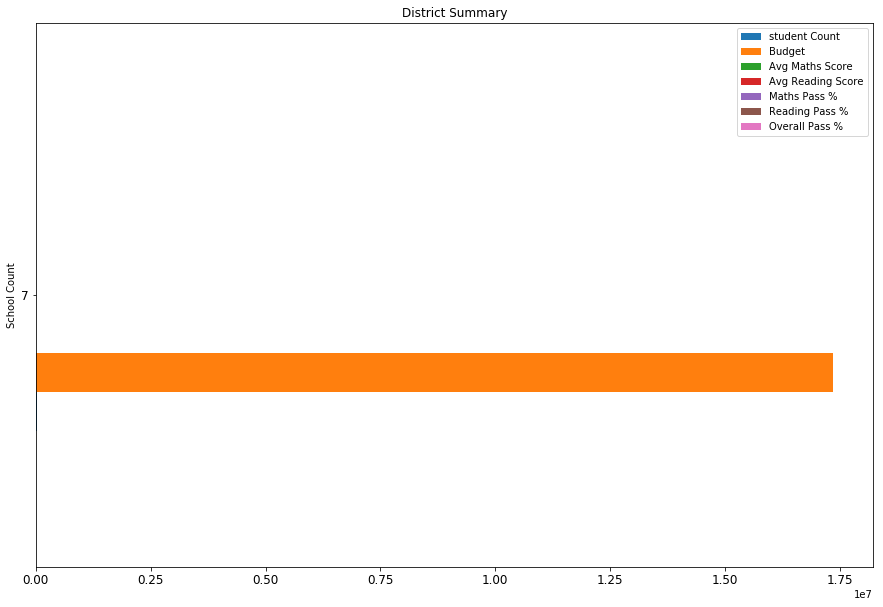

In [180]:
summary_of_District_Schools.set_index('School Count').plot.barh(rot=0, title='District Summary', figsize=(15,10), fontsize=12)

plt.show()

## Pass % by School

<b><i>passSchool()</i></b>
<ol>
<li>The passSchool() is used to calculate summary of Pass rate, based on the school.
<li>The function groups based on <i>School ID</i>, which is the unique value for each school. 
<li>Based on the School ID, school_g_df dataframe is created, which contains rows of one school at a time. 
<li>School's type,budget, pass scores are calculated and appended into a list. 
<li>The list is then used to create a dataframe, which is then returned.
</ol>

In [190]:
def passSchool():
    # get the unique school id
    school_group_df=student_school_df["School ID"].unique()
    # create an empty list
    school_list=[]
    # for each ID repeat
    for school in school_group_df:
        # retrieve all info from the merged df based on ID
        school_g_df = student_school_df[student_school_df["School ID"] == school]
        # retreive the required details
        school_name=school_g_df["school"].unique()[0]
        school_type=school_g_df["type"].unique()[0]
        school_budget=int(school_g_df["budget"].unique())        
        student_school_count=int(school_g_df["size"].unique())
        per_student_budget=school_budget/student_school_count
        maths_score=school_g_df["math_score"].sum()
        avg_math_school_score=round(maths_score/student_school_count,2)
        pass_math=pass_score(school_g_df,"math_score",student_school_count)
        read_score=school_g_df["reading_score"].sum()
        pass_read=pass_score(school_g_df,"reading_score",student_school_count)
        avg_read_school_score=round(read_score/student_school_count,2)
        overall_percent=round((pass_math+pass_read)/2,2)
        #append details to list
        school_list.append([school,school_name,school_type,school_budget,per_student_budget,student_school_count,avg_math_school_score,avg_read_school_score,pass_math,pass_read,overall_percent])
    #create df using list and return    
    school_tot=pd.DataFrame(school_list,columns=['School ID','School Name','Type','Budget','Budget Per Student','Student Count','Avg Math Score','Avg Read Score','Math %','Read %','Overall %'])
    return school_tot
    

In [191]:
#use the function to get summary
school_tot=passSchool()
school_tot.head()


,School ID,School Name,Type,Budget,Budget Per Student,Student Count,Avg Math Score,Avg Read Score,Math %,Read %,Overall %
0,0,Huang High School,District,1910635,655.0,2917,76.63,81.18,63.32,78.81,71.06
1,1,Figueroa High School,District,1884411,639.0,2949,76.71,81.16,63.75,78.43,71.09
2,2,Shelton High School,Charter,1056600,600.0,1761,83.36,83.73,89.89,92.62,91.25
3,3,Hernandez High School,District,3022020,652.0,4635,77.29,80.93,64.75,78.19,71.47
4,4,Griffin High School,Charter,917500,625.0,1468,83.35,83.82,89.71,93.39,91.55


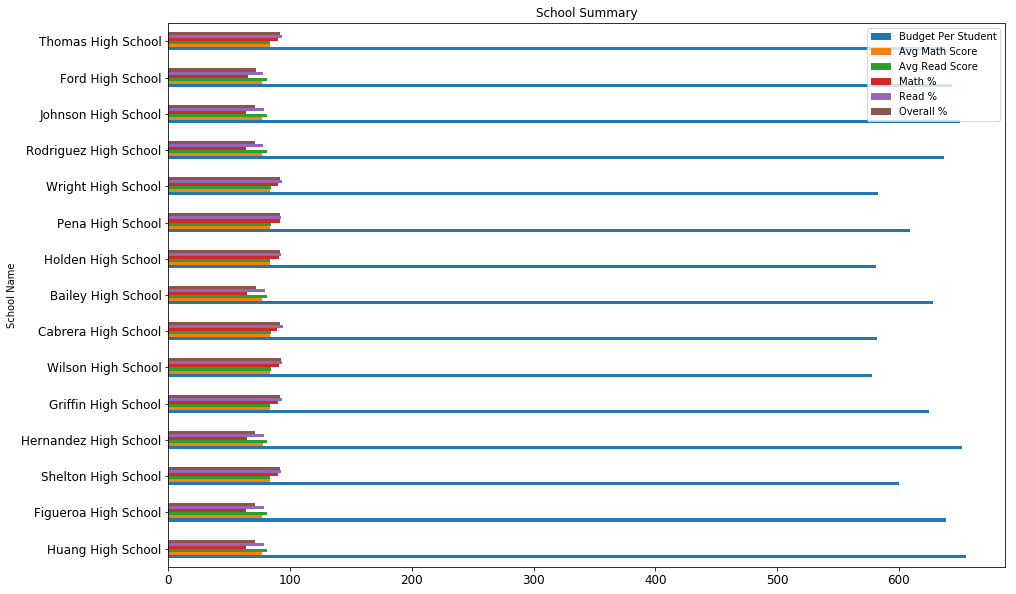

In [192]:
school_tot.set_index('School Name')[["Budget Per Student","Avg Math Score","Avg Read Score","Math %","Read %","Overall %"]].plot.barh(rot=0, title='School Summary', figsize=(15,10), fontsize=12)

plt.show()

#### Top 5 Schools

In [193]:
#sort the schools and display 5 top schools based on Overall %
sort_school_top=school_tot.sort_values(["Overall %"],ascending=False)
sort_school_top.head()

,School ID,School Name,Type,Budget,Budget Per Student,Student Count,Avg Math Score,Avg Read Score,Math %,Read %,Overall %
5,5,Wilson High School,Charter,1319574,578.0,2283,83.27,83.99,90.93,93.25,92.09
9,9,Pena High School,Charter,585858,609.0,962,83.84,84.04,91.68,92.20,91.94
10,10,Wright High School,Charter,1049400,583.0,1800,83.68,83.95,90.28,93.44,91.86
6,6,Cabrera High School,Charter,1081356,582.0,1858,83.06,83.98,89.56,93.86,91.71
8,8,Holden High School,Charter,248087,581.0,427,83.80,83.81,90.63,92.74,91.69


#### Bottom 5 Schools

In [194]:
#sort the schools and display 5 bottom schools based on Overall %
sort_school_bottom=school_tot.sort_values(["Overall %"],ascending=True)
sort_school_bottom.head()

,School ID,School Name,Type,Budget,Budget Per Student,Student Count,Avg Math Score,Avg Read Score,Math %,Read %,Overall %
11,11,Rodriguez High School,District,2547363,637.0,3999,76.84,80.74,64.07,77.74,70.91
0,0,Huang High School,District,1910635,655.0,2917,76.63,81.18,63.32,78.81,71.06
12,12,Johnson High School,District,3094650,650.0,4761,77.07,80.97,63.85,78.28,71.06
1,1,Figueroa High School,District,1884411,639.0,2949,76.71,81.16,63.75,78.43,71.09
3,3,Hernandez High School,District,3022020,652.0,4635,77.29,80.93,64.75,78.19,71.47


## Score by Grade 

<b><i>grade_sort()</b></i>
<ol>
<li>The grade_sort() is used to calculate summary of Pass rate, based on the school and for each grade. 
<li>The function groups based on School ID, which is the unique value for each school. 
<li>Based on the School ID, school_grades dataframe is created, which contains rows of one school at a time. 
<li>For each school, unique grades are retreived and based on each grade, score and pass % is calculated and appended to the appropriate list. 
<li>School's type,budget are also calculated and appended into a list. 
<li>The list is then used to create a dataframe, which is then returned.
</ol>

In [197]:
def grade_sort(subject):
    # get the unique school id
    school_grade_df=student_school_df["School ID"].unique()
    school_grade_list=[]
    for school_g in school_grade_df:
        school_grades = student_school_df[student_school_df["School ID"] == school_g]
        #retrieve the school name 
        school_grade_name = school_grades["school"].unique()[0]
        #retreive the grades
        grades=school_grades["grade"].unique()
        #create lists for each grade
        
        nineth_list=[]
        tenth_list=[]
        eleventh_list=[]
        twelveth_list=[]
        #for each school calculate the avg score 
        for each_grade in grades:
            grade_df=school_grades[school_grades["grade"]==each_grade]
            grade_subject=grade_df[subject].sum()
            grade_student=grade_df["Student ID"].count()
            avg_subject=round(grade_subject/grade_student,2)
            #based on the grade, append to lists
            if each_grade=="9th":
                nineth_list.append(avg_subject)
            elif each_grade=="10th":
                tenth_list.append(avg_subject)
            elif each_grade=="11th":
                eleventh_list.append(avg_subject)
            elif each_grade=="12th":
                twelveth_list.append(avg_subject)
        
        #append all data to list
        school_grade_list.append([school_grade_name,nineth_list[0],tenth_list[0],eleventh_list[0],twelveth_list[0]])
    #create df and return
    grade_school_df=pd.DataFrame(school_grade_list,columns=['School Name','9th','10th','11th','12th'])
    return grade_school_df  # school_g_df=school_g_df["school"].unique()

In [198]:
grade_math_df=grade_sort("math_score")
grade_read_df=grade_sort("reading_score")

##### AVERAGE MATH SCORE BY GRADE

In [199]:
grade_math_df.head()


,School Name,9th,10th,11th,12th
0,Huang High School,77.03,75.91,76.45,77.23
1,Figueroa High School,76.40,76.54,76.88,77.15
2,Shelton High School,83.42,82.92,83.38,83.78
3,Hernandez High School,77.44,77.34,77.14,77.19
4,Griffin High School,82.04,84.23,83.84,83.36


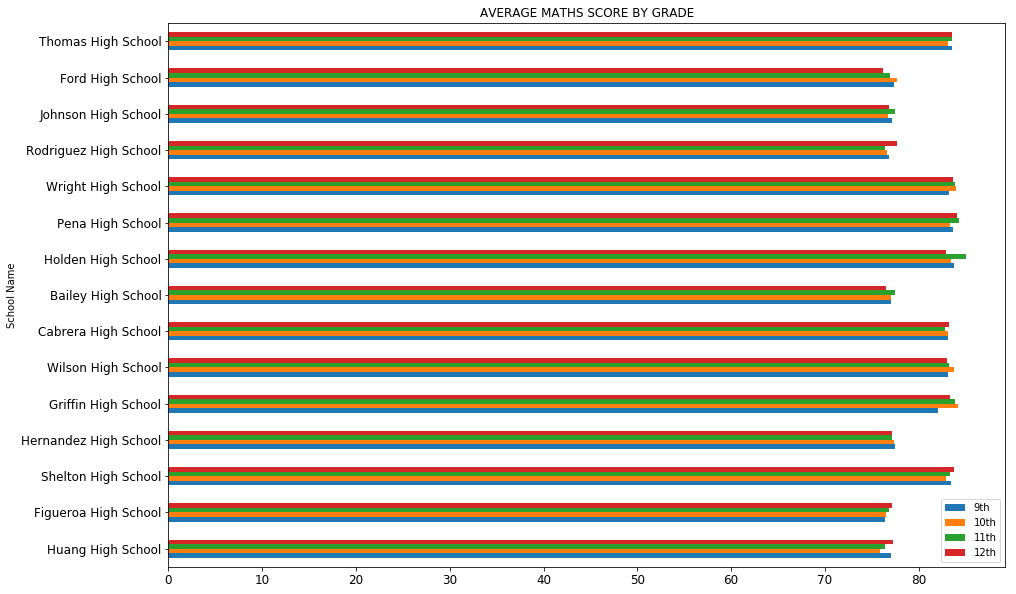

In [200]:
grade_math_df.set_index('School Name').plot.barh(rot=0, title='AVERAGE MATHS SCORE BY GRADE', figsize=(15,10), fontsize=12)

plt.show()

##### AVERAGE READING SCORE BY GRADE

In [201]:
grade_read_df.head()


,School Name,9th,10th,11th,12th
0,Huang High School,81.29,81.51,81.42,80.31
1,Figueroa High School,81.20,81.41,80.64,81.38
2,Shelton High School,84.12,83.44,84.37,82.78
3,Hernandez High School,80.87,80.66,81.40,80.86
4,Griffin High School,83.37,83.71,84.29,84.01


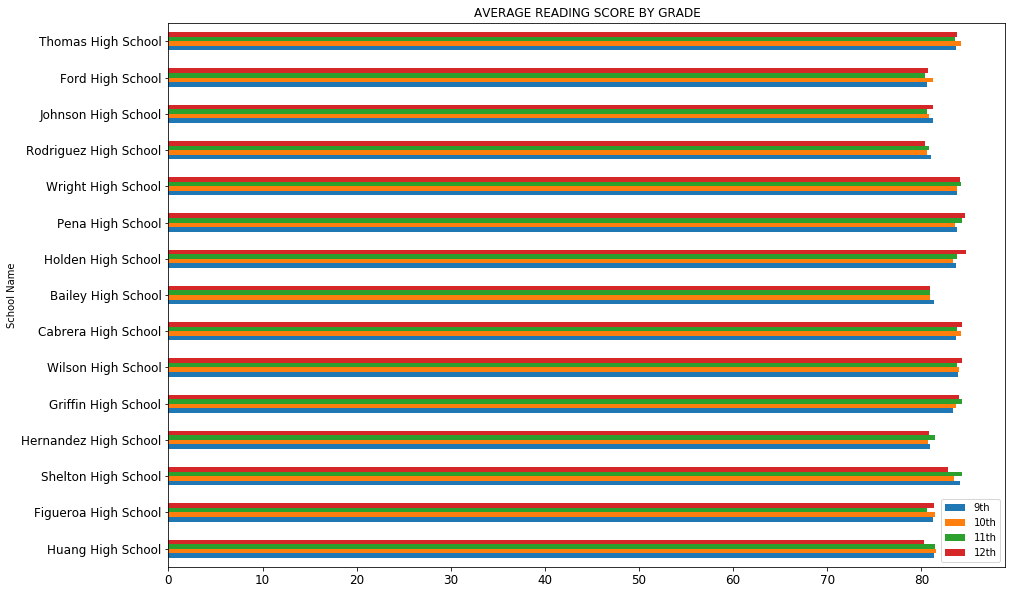

In [202]:
grade_read_df.set_index('School Name').plot.barh(rot=0, title='AVERAGE READING SCORE BY GRADE', figsize=(15,10), fontsize=12)

plt.show()

### SCORE BY SCHOOL SPENDING

<i><b>spending_student()</b></i>
<ol>
<li> The function is used to create dataframe based on each school id
<li> The function calculates total score, and uses pass_score() to get pass count by setting student count=0
<li> Function also computes average budget per school
<li> It returns the dataframe with all values
</ol>

In [24]:
def spending_student():
    school_spend_df=student_school_df["School ID"].unique()
    school_spend_list=[]
    #for each school retrieve values
    for school_g in school_spend_df:
        school_spend = student_school_df[student_school_df["School ID"] == school_g]
        spend_student_count=school_spend["Student ID"].count()
        spend_type=school_spend["type"].unique()[0]
        school_spend_total=school_spend["budget"].unique()[0]
        avg_budget_per_student=school_spend_total/spend_student_count
        school_spend_name = school_spend["school"].unique()[0]
        spend_math_score=school_spend["math_score"].sum()
        spend_read_score=school_spend["reading_score"].sum()
        maths_pass=pass_score(school_spend,"math_score",0)
        read_pass=pass_score(school_spend,"reading_score",0)
        school_spend_list.append([school_g,spend_type,spend_student_count,school_spend_name,school_spend_total,avg_budget_per_student,spend_math_score,spend_read_score,maths_pass,read_pass])
        sc_df=pd.DataFrame(school_spend_list,columns=["School ID","Type",'Student Count',"School Name",'School Budget',"Budget per Student",'Maths','Reading',"Maths Pass Count","Read Pass Count"])
    return sc_df


In [71]:
# call the function to retrieve df 
spend_df=spending_student()
#create bins
bins=[0,585, 615, 645, 675]
# Create the names for the four bins
spend_labels = ['<585', '585-615', '616-645', '646-675']
# cut bins according to values
spend_df["Spend Group"] = pd.cut(spend_df["Budget per Student"],bins,labels=spend_labels )
spend_df.head()


,School ID,Type,Student Count,School Name,School Budget,Budget per Student,Maths,Reading,Maths Pass Count,Read Pass Count,Spend Group
0,0,District,2917,Huang High School,1910635,655.0,223528,236810,1847,2299,646-675
1,1,District,2949,Figueroa High School,1884411,639.0,226223,239335,1880,2313,616-645
2,2,Charter,1761,Shelton High School,1056600,600.0,146796,147441,1583,1631,585-615
3,3,District,4635,Hernandez High School,3022020,652.0,358238,375131,3001,3624,646-675
4,4,Charter,1468,Griffin High School,917500,625.0,122360,123043,1317,1371,616-645


<b><i>spending_group()</i></b>
<ol>
<li>The function spending_group() uses the dataframe from spending_student().
<li>Using the dataframe, the function retrieves scores and calculates average and pass %. Since the score field has sum of score for each school, sum of that value will yield sum for each bin
<li> returns the df
</ol>

In [204]:
 def spending_group(spend_df,criteria):
    # criteria is the column based on which the grouping has to be done
    school_spend_group_df=spend_df[criteria].unique()
    school_spend_mark_list=[]
    for spend in school_spend_group_df:
        #for the criteria values in the list retrieve required fields from df
        school_spends = spend_df[spend_df[criteria] == spend]
        spendgroup_student_count=school_spends["Student Count"].sum()
        maths_score_group=school_spends["Maths"].sum()
        reading_score_group=school_spends["Reading"].sum()
        avg_maths_score_group=round(maths_score_group/spendgroup_student_count,2)
        avg_reading_score_group=round(reading_score_group/spendgroup_student_count,2)
        percent_maths=round((school_spends["Maths Pass Count"].sum()/spendgroup_student_count)*100,2)
        percent_read=round((school_spends["Read Pass Count"].sum()/spendgroup_student_count)*100,2)
        avg_pass=round((percent_maths+percent_read)/2,2)
        #append to list
        school_spend_mark_list.append([spend,avg_maths_score_group,avg_reading_score_group,percent_maths,percent_read,avg_pass])
    #create df based on list and return df
    grade_school_spend_df=pd.DataFrame(school_spend_mark_list,columns=[criteria+' Range','Avg Maths Score','Avg Reading Score','Maths %','Read %',"Overall %"])
    return grade_school_spend_df 

In [205]:
grade_school_spend=spending_group(spend_df,"Spend Group")
grade_school_spend


,Spend Group Range,Avg Maths Score,Avg Reading Score,Maths %,Read %,Overall %
0,646-675,77.05,81.01,64.06,78.37,71.22
1,616-645,78.06,81.43,68.96,80.95,74.95
2,585-615,83.53,83.84,90.53,92.47,91.50
3,<585,83.36,83.96,90.33,93.45,91.89


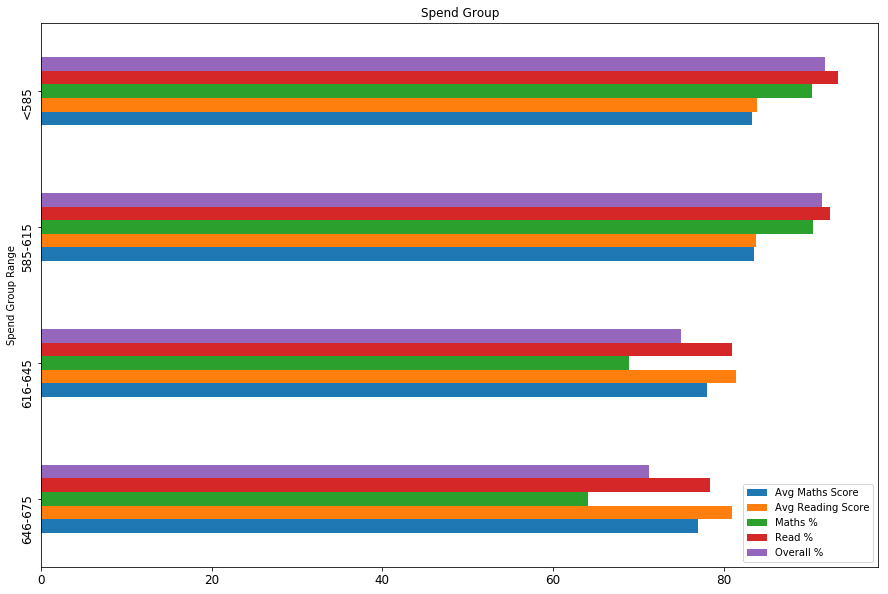

In [206]:
grade_school_spend.set_index('Spend Group Range').plot.barh(rot=90, title='Spend Group', figsize=(15,10), fontsize=12)
#grade_school_spend.plot(kind='bar')


plt.show()

### Score By School Size

Use the spending_student() create df for grouping by size

In [207]:
size_df=spending_student()

size_df.head()

,School ID,Type,Student Count,School Name,School Budget,Budget per Student,Maths,Reading,Maths Pass Count,Read Pass Count
0,0,District,2917,Huang High School,1910635,655.0,223528,236810,1847,2299
1,1,District,2949,Figueroa High School,1884411,639.0,226223,239335,1880,2313
2,2,Charter,1761,Shelton High School,1056600,600.0,146796,147441,1583,1631
3,3,District,4635,Hernandez High School,3022020,652.0,358238,375131,3001,3624
4,4,Charter,1468,Griffin High School,917500,625.0,122360,123043,1317,1371


In [208]:
#create bins and cut based on labels
bins_size=[0,1700, 3400, 5100]
size_labels = ['<1700', '1700-3400', '3400-5100']
size_df["Size Group"] = pd.cut(spend_df["Student Count"],bins_size,labels=size_labels )
size_df.head()

,School ID,Type,Student Count,School Name,School Budget,Budget per Student,Maths,Reading,Maths Pass Count,Read Pass Count,Size Group
0,0,District,2917,Huang High School,1910635,655.0,223528,236810,1847,2299,1700-3400
1,1,District,2949,Figueroa High School,1884411,639.0,226223,239335,1880,2313,1700-3400
2,2,Charter,1761,Shelton High School,1056600,600.0,146796,147441,1583,1631,1700-3400
3,3,District,4635,Hernandez High School,3022020,652.0,358238,375131,3001,3624,3400-5100
4,4,Charter,1468,Griffin High School,917500,625.0,122360,123043,1317,1371,<1700


In [209]:
#call the spending_group function to calculate the  group based %
grade_school_size=spending_group(size_df,"Size Group")
#grade_school_size.rest_index()
grade_school_size.set_index('Size Group Range')
grade_school_size.head()

,Size Group Range,Avg Maths Score,Avg Reading Score,Maths %,Read %,Overall %
0,1700-3400,79.89,82.40,76.51,85.37,80.94
1,3400-5100,77.07,80.93,64.34,78.42,71.38
2,<1700,83.52,83.88,90.41,92.90,91.66


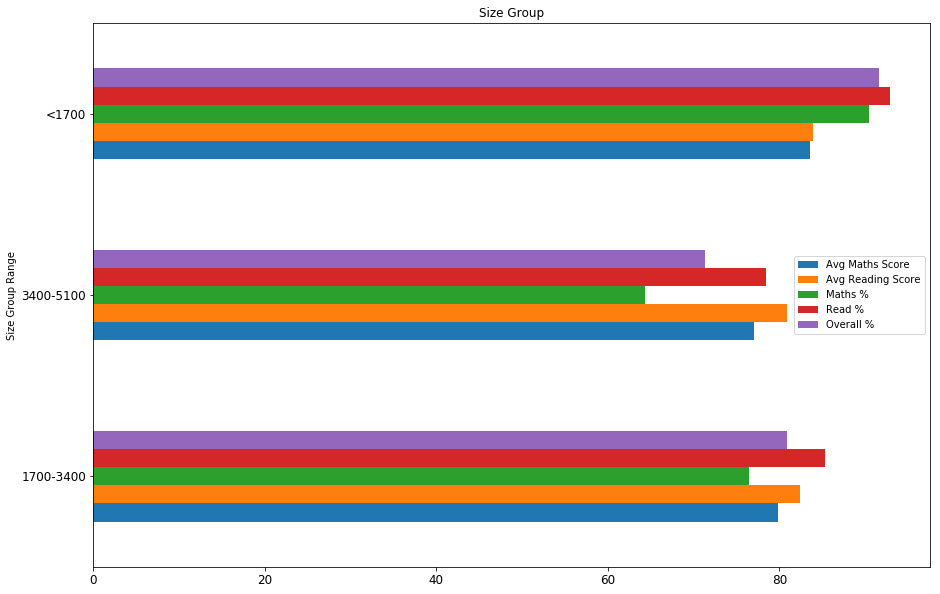

In [216]:
grade_school_size.set_index('Size Group Range').plot.barh(rot=0, title='Size Group', figsize=(15,10), fontsize=12)

plt.show()

### Scores by School Type

In [211]:
#Use the spending_student() create df for grouping by type
type_df=spending_student()

type_df.head()

,School ID,Type,Student Count,School Name,School Budget,Budget per Student,Maths,Reading,Maths Pass Count,Read Pass Count
0,0,District,2917,Huang High School,1910635,655.0,223528,236810,1847,2299
1,1,District,2949,Figueroa High School,1884411,639.0,226223,239335,1880,2313
2,2,Charter,1761,Shelton High School,1056600,600.0,146796,147441,1583,1631
3,3,District,4635,Hernandez High School,3022020,652.0,358238,375131,3001,3624
4,4,Charter,1468,Griffin High School,917500,625.0,122360,123043,1317,1371


In [212]:
#call the spending_group function to calculate the  group based %
grade_school_district=spending_group(size_df,"Type")
grade_school_district.set_index("Type Range")
grade_school_district

,Type Range,Avg Maths Score,Avg Reading Score,Maths %,Read %,Overall %
0,District,76.99,80.96,64.31,78.37,71.34
1,Charter,83.41,83.90,90.28,93.15,91.72


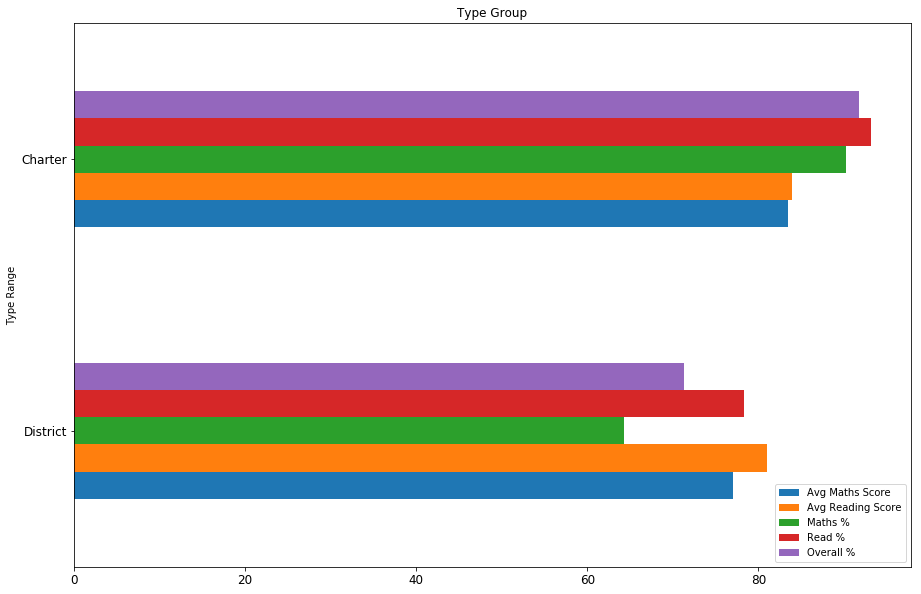

In [214]:
grade_school_district.set_index('Type Range').plot.barh(rot=0, title='Type Group', figsize=(15,10), fontsize=12)
plt.show()